In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# For better plots
sns.set(style="whitegrid")

In [2]:
ic50_data = pd.read_csv('cancer_cell_line_data1.csv', encoding="latin1")  

print("IC50 Data Shape:", ic50_data.shape)

ic50_data.head()

IC50 Data Shape: (2425, 8)


,Drugs,Cell line,TCGA classification,Tissue,Tissue sub-type,IC50,AUC,Smiles
0,Paclitaxel,LC-2-ad,LUAD,lung,lung_NSCLC_adenocarcinoma,0.001262,0.256296,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
1,NaN,TE-15,ESCA,aero_digestive_tract,oesophagus,0.001272,0.271805,NaN
2,NaN,PSN1,PAAD,pancreas,pancreas,0.001334,0.242556,NaN
3,NaN,TE-11,ESCA,aero_digestive_tract,oesophagus,0.001370,0.259042,NaN
4,NaN,MZ1-PC,PAAD,pancreas,pancreas,0.001675,0.307640,NaN


In [3]:
digestive_system_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'digestive_system']

print("digestivel System Cell line Shape:",digestive_system_cell_lines.shape)

# Print all digestive system cell line rows
print(digestive_system_cell_lines.to_string(index=False))

digestivel System Cell line Shape: (133, 8)
      Drugs     Cell line TCGA classification           Tissue        Tissue sub-type      IC50      AUC                                                                                                                   Smiles
         NaN        ETK-1        UNCLASSIFIED digestive_system          biliary_tract  0.002327 0.346697                                                                                                                      NaN
         NaN      HuTu-80        UNCLASSIFIED digestive_system digestive_system_other  0.002393 0.331728                                                                                                                      NaN
         NaN          RKO              COREAD digestive_system        large_intestine  0.003376 0.395522                                                                                                                      NaN
         NaN       HSC-39                STAD digest

In [4]:
ic50_data.columns = ic50_data.columns.str.strip()

In [5]:
digestive_system_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'digestive_system' ]

In [6]:
ic50_digestive_avg =digestive_system_cell_lines.groupby(['Cell line', 'Drugs'], as_index=False)['IC50'].mean()
pivot_table = ic50_digestive_avg.pivot(index='Drugs', columns='Cell line', values='IC50')


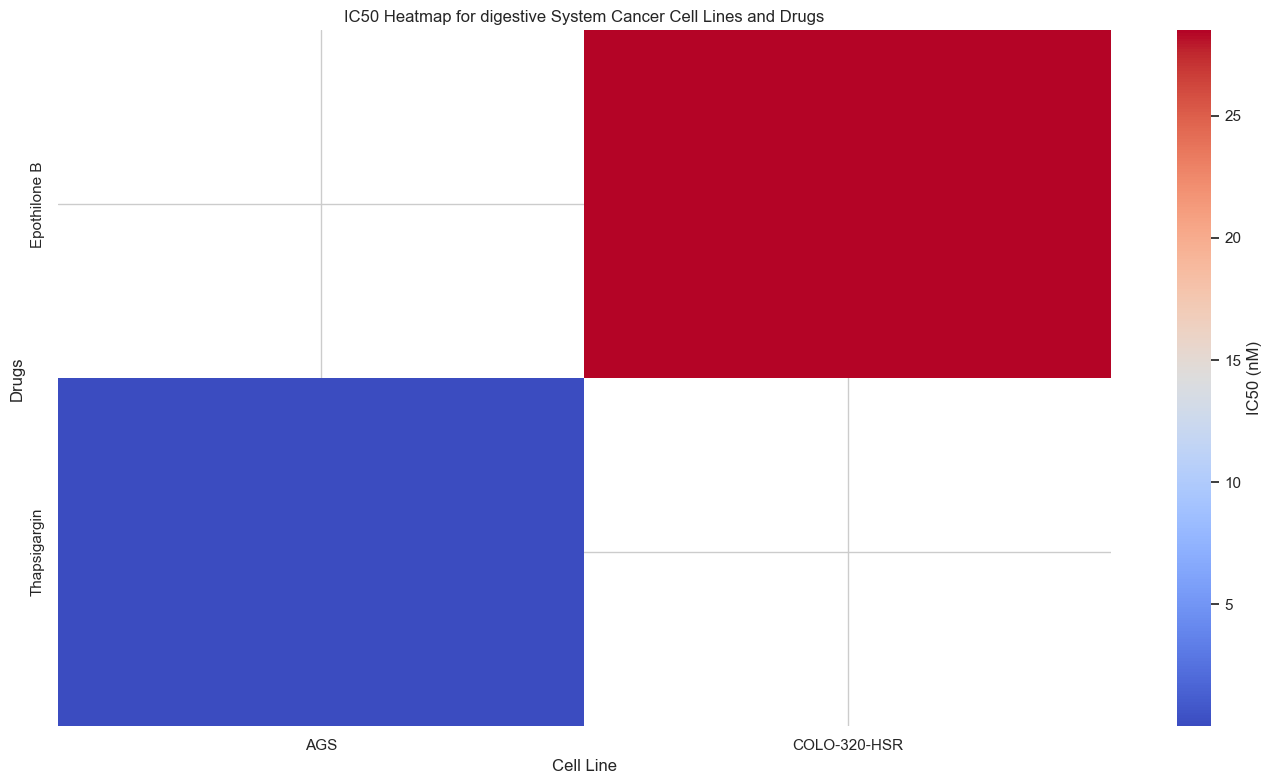

<Axes: xlabel='Cell line', ylabel='Drugs'>

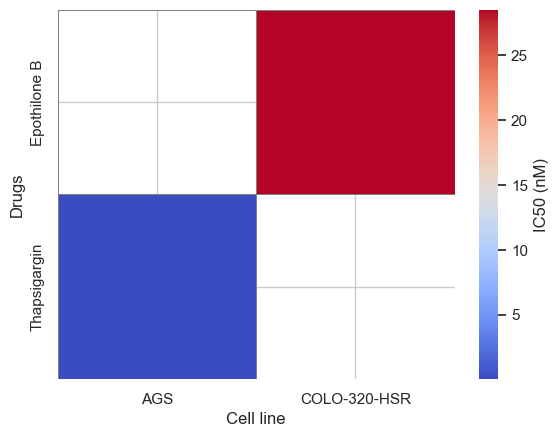

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=False, cmap="coolwarm", fmt=".1f", cbar_kws={'label': 'IC50 (nM)'})
plt.title('IC50 Heatmap for digestive System Cancer Cell Lines and Drugs')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.tight_layout()
# Save as PNG
plt.savefig("IC50_Heatmap_Digestive system Cancer.png", dpi=300, bbox_inches='tight')
plt.show()
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', cbar_kws={'label': 'IC50 (nM)'}, linewidths=0.5, linecolor='gray')


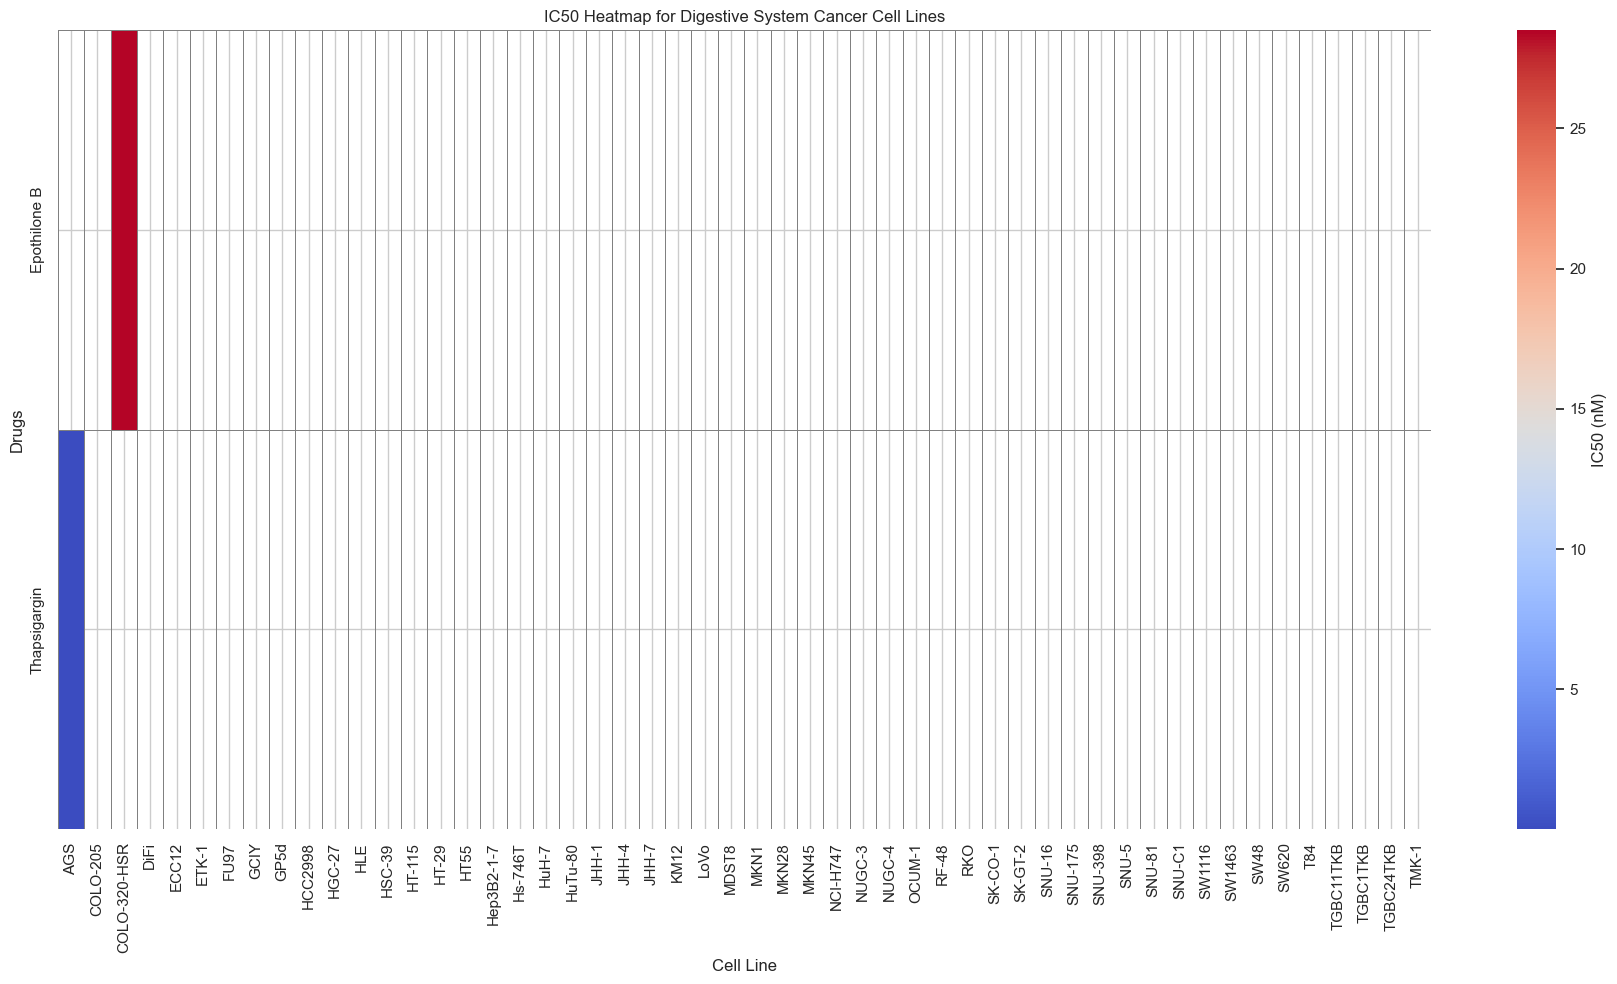

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter digestive system data
digestive_system = ic50_data[ic50_data['Tissue'].str.lower() == 'digestive_system']

# Get unique digestive system cell lines
cell_lines = digestive_system['Cell line'].unique()

# Calculate average IC50 per drug-cell line pair
ic50_avg = digestive_system.groupby(['Drugs', 'Cell line'], as_index=False)['IC50'].mean()

# Pivot into heatmap format
pivot_table = ic50_avg.pivot(index='Drugs', columns='Cell line', values='IC50')

# Ensure all cell lines appear on x-axis
pivot_table = pivot_table.reindex(columns=sorted(cell_lines))

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', cbar_kws={'label': 'IC50 (nM)'}, linewidths=0.5, linecolor='gray')

plt.title('IC50 Heatmap for Digestive System Cancer Cell Lines')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Digestive_system_ic50_heatmap.png", format='png')

plt.show()


In [9]:
# Step 1: Load Mutation Data
mutation_data = pd.read_csv('mutations_all_20250318.csv')

In [10]:
 target_genes = [ "ATP2A2", "ATF6", "EIF2AK3", "DDIT3", "HSPA5", "XBP1", "ERN1", "CASP3", "CASP7", "CASP9",
    "BAX", "BCL2", "BCL2L1", "MCL1", "CHOP", "GADD34", "PPP1R15A", "HSP90B1", "PDIA3", "PDIA4",
    "PDIA6", "CALR", "CANX", "EDEM1", "HERPUD1",
    "TUBB", "TUBA1A", "TUBB3", "TUBB4A", "TUBB6", "TUBA4A", "MAP1A", "MAP1B", "MAP2", "MAP4",
    "MAPT", "KIF11", "KIF18A", "KIF20A", "KIF23", "DYNC1H1", "DYNLL1", "DCTN1", "CLIP1", "CLASP1",
    "CLASP2", "STMN1", "STMN2", "NEK6", "NEK7", "AURKA"
]

# Step 1: Rename model_name to Cell_line (if not already done)
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
44,CLASP1,"[OAW-28, KP-1N, B-CPAP, RS4-11, EC-GI-10, HTC-...",96
40,DYNC1H1,"[M120327_3, HTC-C3, HDQ-P1, CW-2, COR-L321, CA...",88
33,MAP2,"[HCM-SANG-0281-C18, HCM-SANG-0273-C18, EC-GI-1...",69
45,CLASP2,"[EC-GI-10, COLO-679, LB2518-MEL, CAL-12T, RL, ...",65
42,DCTN1,"[EC-GI-10, HTC-C3, NCI-H1436, COLO-679, LCLC-9...",61


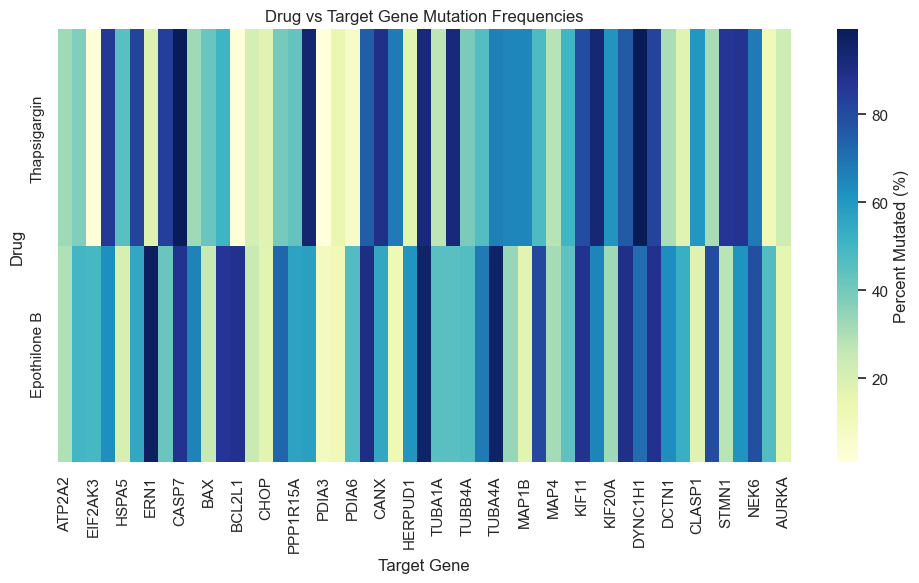

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the list of drugs
drugs = [
    'Thapsigargin', 'Epothilone B'
]

target_genes = [  "ATP2A2", "ATF6", "EIF2AK3", "DDIT3", "HSPA5", "XBP1", "ERN1", "CASP3", "CASP7", "CASP9",
    "BAX", "BCL2", "BCL2L1", "MCL1", "CHOP", "GADD34", "PPP1R15A", "HSP90B1", "PDIA3", "PDIA4",
    "PDIA6", "CALR", "CANX", "EDEM1", "HERPUD1",
    "TUBB", "TUBA1A", "TUBB3", "TUBB4A", "TUBB6", "TUBA4A", "MAP1A", "MAP1B", "MAP2", "MAP4",
    "MAPT", "KIF11", "KIF18A", "KIF20A", "KIF23", "DYNC1H1", "DYNLL1", "DCTN1", "CLIP1", "CLASP1",
    "CLASP2", "STMN1", "STMN2", "NEK6", "NEK7", "AURKA"]  # List of target genes

# Create random mutation data (you should replace this with your actual mutation data)
# This matrix should be of shape (len(drugs), len(target_genes))
data = np.random.rand(len(drugs), len(target_genes)) * 100  # Example data as percentages

# Create DataFrame
df = pd.DataFrame(data, columns=target_genes, index=drugs)

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Percent Mutated (%)'})

# Titles and labels
plt.title('Drug vs Target Gene Mutation Frequencies')
plt.xlabel('Target Gene')
plt.ylabel('Drug')
plt.savefig("drug_gene_mutation_Digestive_system.png", format="png")

# Show plot
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Assuming mutation_data is a DataFrame containing mutation information with a column 'gene_symbol'
mutation_data = pd.read_csv('mutations_all_20250318.csv')  # Replace with your data source

# List of target genes
target_genes = [
     "ATP2A2", "ATF6", "EIF2AK3", "DDIT3", "HSPA5", "XBP1", "ERN1", "CASP3", "CASP7", "CASP9",
    "BAX", "BCL2", "BCL2L1", "MCL1", "CHOP", "GADD34", "PPP1R15A", "HSP90B1", "PDIA3", "PDIA4",
    "PDIA6", "CALR", "CANX", "EDEM1", "HERPUD1",
    "TUBB", "TUBA1A", "TUBB3", "TUBB4A", "TUBB6", "TUBA4A", "MAP1A", "MAP1B", "MAP2", "MAP4",
    "MAPT", "KIF11", "KIF18A", "KIF20A", "KIF23", "DYNC1H1", "DYNLL1", "DCTN1", "CLIP1", "CLASP1",
    "CLASP2", "STMN1", "STMN2", "NEK6", "NEK7", "AURKA"
]

# Filter mutation data to find rows where gene_symbol is in target_genes list
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Display filtered data
print(filtered_mutation_data)

# Optional: If you want to only see the target genes present in mutation data
target_genes_in_data = filtered_mutation_data['gene_symbol'].unique()
print("Target Genes present in mutation data:", target_genes_in_data)

        gene_symbol  ensembl_gene_id transcript_id             model_name  \
553           PDIA6  ENSG00000143870           NaN      HCM-SANG-0547-C25   
1086         ATP2A2  ENSG00000174437           NaN      HCM-SANG-0282-C18   
1087         ATP2A2  ENSG00000174437           NaN      HCM-SANG-0282-C18   
1088         ATP2A2  ENSG00000174437           NaN      HCM-SANG-0282-C18   
1491         ATP2A2  ENSG00000174437           NaN      HCM-SANG-0274-C18   
...             ...              ...           ...                    ...   
1035809        MAP4  ENSG00000047849           NaN  Mesobank_CellLine-50T   
1035810        MAP4  ENSG00000047849           NaN  Mesobank_CellLine-50T   
1035811        MAP4  ENSG00000047849           NaN  Mesobank_CellLine-50T   
1035812        MAP4  ENSG00000047849           NaN  Mesobank_CellLine-50T   
1046687       CASP3  ENSG00000164305           NaN  Mesobank_CellLine-50T   

          model_id protein_mutation rna_mutation cdna_mutation chromosome  

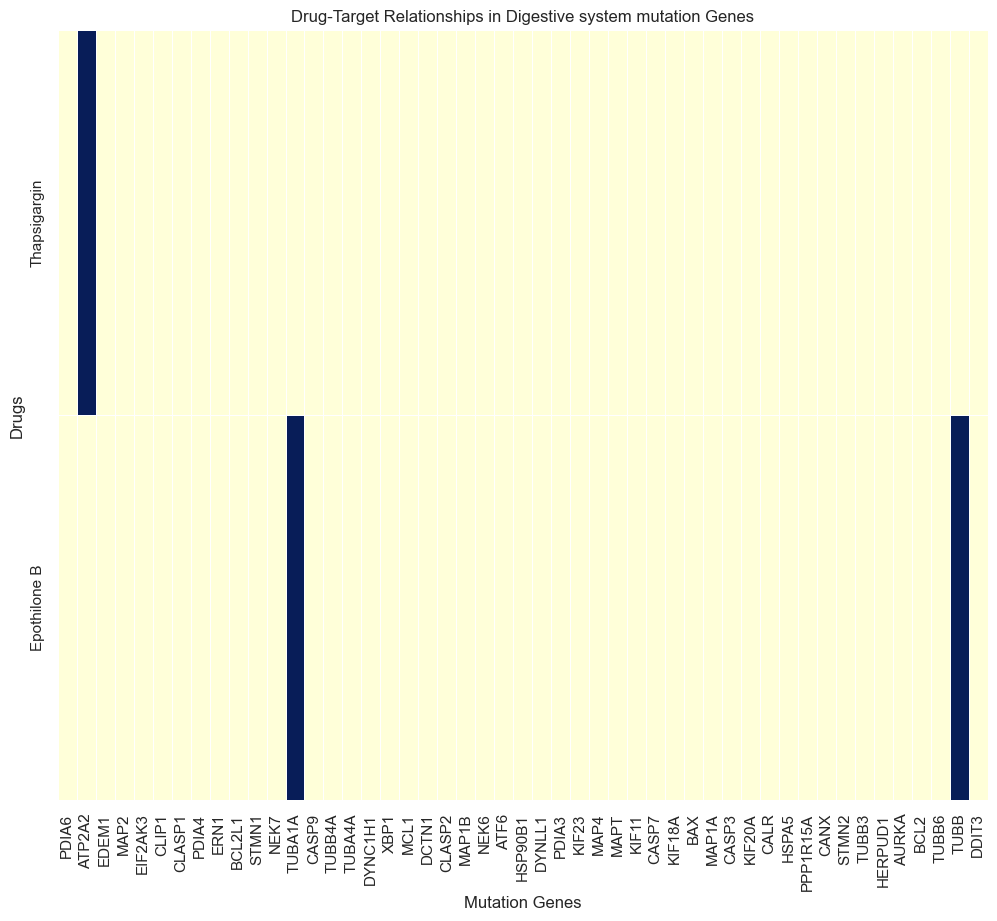

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of target genes present in mutation data
target_genes_present = ['PDIA6', 'ATP2A2', 'EDEM1', 'MAP2', 'EIF2AK3', 'CLIP1', 'CLASP1', 'PDIA4', 'ERN1',
 'BCL2L1', 'STMN1', 'NEK7', 'TUBA1A', 'CASP9' ,'TUBB4A', 'TUBA4A', 'DYNC1H1',
 'XBP1', 'MCL1', 'DCTN1', 'CLASP2', 'MAP1B', 'NEK6', 'ATF6', 'HSP90B1', 'DYNLL1',
 'PDIA3', 'KIF23', 'MAP4', 'MAPT', 'KIF11', 'CASP7', 'KIF18A', 'BAX', 'MAP1A',
 'CASP3', 'KIF20A', 'CALR', 'HSPA5', 'PPP1R15A', 'CANX', 'STMN2', 'TUBB3',
 'HERPUD1', 'AURKA', 'BCL2', 'TUBB6', 'TUBB', 'DDIT3']
drug_target_mapping = {
    "Thapsigargin": ["ATP2A2"],
    "Epothilone B": ["TUBB", "TUBA1A"]
}


# Initialize a DataFrame to store the drug-gene relationship (1 if the drug targets the gene, 0 if not)
drug_target_df = pd.DataFrame(0, index=drugs, columns=target_genes_present)

# Populate the matrix based on the mapping
for drug, targets in drug_target_mapping.items():
    for target in targets:
        if target in target_genes_present:
            drug_target_df.at[drug, target] = 1

# Plot the heatmap with drugs on Y-axis and target genes on X-axis
plt.figure(figsize=(12, 10))
sns.heatmap(drug_target_df, annot=False, cmap='YlGnBu', cbar=False, linewidths=0.5)
plt.title('Drug-Target Relationships in Digestive system mutation Genes')
plt.xlabel('Mutation Genes')
plt.ylabel('Drugs')
plt.savefig("Relationship_Between_Drug Vs Target_in Digestive System.png", dpi=300)
plt.show()


In [14]:
target_genes = ['PDIA6,' 'ATP2A2', 'EDEM1', 'MAP2', 'EIF2AK3', 'CLIP1', 'CLASP1', 'PDIA4', 'ERN1',
 'BCL2L1', 'STMN1', 'NEK7', 'TUBA1A', 'CASP9' ,'TUBB4A', 'TUBA4A', 'DYNC1H1',
 'XBP1', 'MCL1', 'DCTN1', 'CLASP2', 'MAP1B', 'NEK6', 'ATF6', 'HSP90B1', 'DYNLL1',
 'PDIA3', 'KIF23', 'MAP4', 'MAPT', 'KIF11', 'CASP7', 'KIF18A', 'BAX', 'MAP1A',
 'CASP3', 'KIF20A', 'CALR', 'HSPA5', 'PPP1R15A', 'CANX', 'STMN2', 'TUBB3',
 'HERPUD1', 'AURKA', 'BCL2', 'TUBB6', 'TUBB', 'DDIT3']

# Step 1: Rename model_name to Cell_line (if not already done)
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
5,CLASP1,"[OAW-28, KP-1N, B-CPAP, RS4-11, EC-GI-10, HTC-...",96
15,DYNC1H1,"[M120327_3, HTC-C3, HDQ-P1, CW-2, COR-L321, CA...",88
2,MAP2,"[HCM-SANG-0281-C18, HCM-SANG-0273-C18, EC-GI-1...",69
19,CLASP2,"[EC-GI-10, COLO-679, LB2518-MEL, CAL-12T, RL, ...",65
27,MAP4,"[HTC-C3, HDQ-P1, KALS-1, U-2-OS, RKO, SNU-387,...",61


In [15]:
# Step 1: Filter mutation_data for only target genes
target_gene_mutations = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Step 2: Optional – Show how many cell lines each gene is mutated in
mutation_counts = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .nunique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Line Count'})
    .sort_values(by='Mutated Cell Line Count', ascending=False)
)

# Step 3: (Optional) See the actual cell lines for each gene
mutation_details = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .unique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Lines'})
)

# Step 4: Merge both summaries if you want
mutation_summary = pd.merge(mutation_counts, mutation_details, on='Target Gene')

# Display full filtered mutation data (raw rows)
print("Filtered mutations in target genes:")
print(target_gene_mutations.head())

# Display summary
print("\nMutation summary (gene, count, cell lines):")
print(mutation_summary.head())


Filtered mutations in target genes:
     gene_symbol  ensembl_gene_id transcript_id          Cell_line   model_id  \
1614       EDEM1  ENSG00000134109           NaN  HCM-SANG-0265-C18  SIDM01281   
1688        MAP2  ENSG00000078018           NaN  HCM-SANG-0281-C18  SIDM01299   
1912        MAP2  ENSG00000078018           NaN  HCM-SANG-0273-C18  SIDM01314   
2936     EIF2AK3  ENSG00000172071           NaN  HCM-SANG-0273-C18  SIDM01314   
2969       EDEM1  ENSG00000134109           NaN  HCM-SANG-0273-C18  SIDM01314   

     protein_mutation     rna_mutation    cdna_mutation chromosome  position  \
1614              p.?        r.5157g>a              c.?        NaN       NaN   
1688                -              r.?                -        NaN       NaN   
1912     p.T1474fs*22  r.4919_4920insa  c.4413_4414insA        NaN       NaN   
2936              p.?         r.168c>u              c.?        NaN       NaN   
2969              p.?        r.5020u>g              c.?        NaN       NaN 

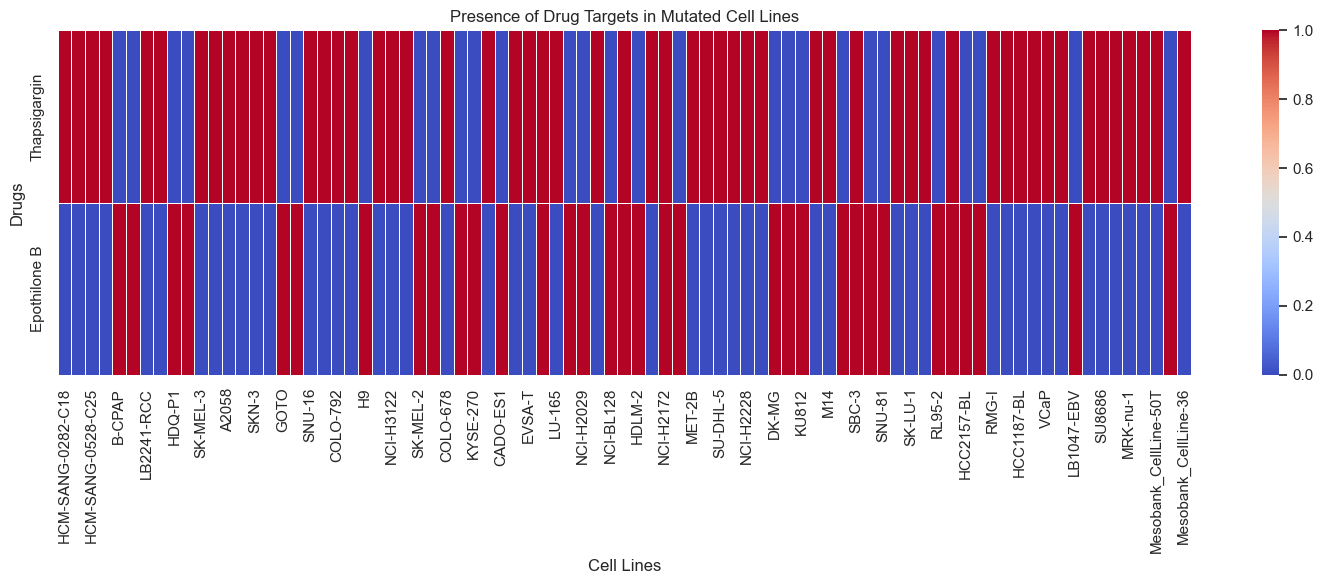

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your drug-target mapping
drug_to_targets = {
     "Thapsigargin": ["ATP2A2"],
    "Epothilone B": ["TUBB", "TUBA1A"] 
}

# Step 1: Filter mutation data for only relevant genes
relevant_genes = set(g for targets in drug_to_targets.values() for g in targets)
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(relevant_genes)]

# Step 2: Build drug-cell line matrix
cell_lines = filtered_mutation_data['Cell_line'].unique()
drug_cell_matrix = pd.DataFrame(0, index=drug_to_targets.keys(), columns=cell_lines)

# Step 3: Populate matrix
for drug, targets in drug_to_targets.items():
    for gene in targets:
        cell_lines_with_gene = filtered_mutation_data[filtered_mutation_data['gene_symbol'] == gene]['Cell_line'].unique()
        drug_cell_matrix.loc[drug, cell_lines_with_gene] = 1

# Step 4: Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(drug_cell_matrix, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Presence of Drug Targets in Mutated Cell Lines")
plt.xlabel("Cell Lines")
plt.ylabel("Drugs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Mutated_cell_Line in_Digestive_system.png", dpi=300)
plt.show()


C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_2784\4122497767.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')


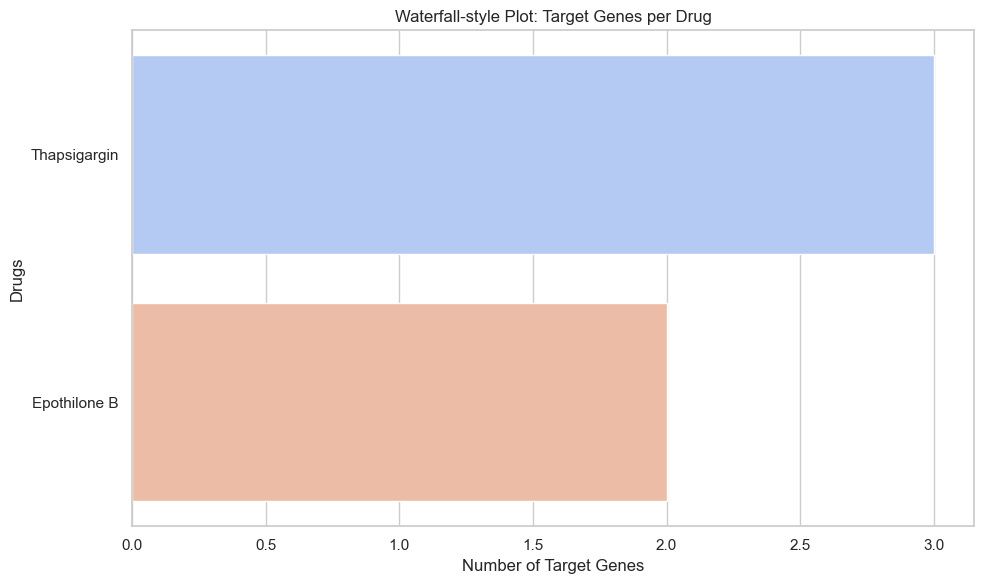

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample binary data for 2 drugs × 4 genes
# Reduced the data to only have 2 rows (for 2 drugs)
data = {
    'Gene1': [1, 0],    # Only 2 values now
    'Gene2': [1, 1],    # Only 2 values now
    'Gene3': [0, 1],    # Only 2 values now
    'Gene4': [1, 0]     # Only 2 values now
}

# 2 drugs (index)
df = pd.DataFrame(data, index=[
    "Thapsigargin",
    "Epothilone B" 
])

# Waterfall-style: count of target genes per drug
drug_target_counts = df.sum(axis=1).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')
plt.xlabel("Number of Target Genes")
plt.ylabel("Drugs")
plt.title("Waterfall-style Plot: Target Genes per Drug")
plt.tight_layout()
plt.savefig("waterfall_target_genes_per_drug in_Digestive_system.png", dpi=300)
plt.show()

In [18]:
import pandas as pd

# Expression data load karo
expr_df = pd.read_csv('rnaseq_all_20250117.csv')

# Gene symbol ko uppercase karo (matching ke liye)
expr_df['gene_symbol'] = expr_df['gene_symbol'].str.upper()

In [19]:
target_genes = [
  'PDIA6', 'ATP2A2', 'EDEM1', 'MAP2', 'EIF2AK3', 'CLIP1', 'CLASP1', 'PDIA4', 'ERN1',
 'BCL2L1', 'STMN1', 'NEK7', 'TUBA1A', 'CASP9' ,'TUBB4A', 'TUBA4A', 'DYNC1H1',
 'XBP1', 'MCL1', 'DCTN1', 'CLASP2', 'MAP1B', 'NEK6', 'ATF6', 'HSP90B1', 'DYNLL1',
 'PDIA3', 'KIF23', 'MAP4', 'MAPT', 'KIF11', 'CASP7', 'KIF18A', 'BAX', 'MAP1A',
 'CASP3', 'KIF20A', 'CALR', 'HSPA5', 'PPP1R15A', 'CANX', 'STMN2', 'TUBB3',
 'HERPUD1', 'AURKA', 'BCL2', 'TUBB6', 'TUBB', 'DDIT3'
]

In [20]:
filtered_expr_df = expr_df[expr_df['gene_symbol'].isin(target_genes)]

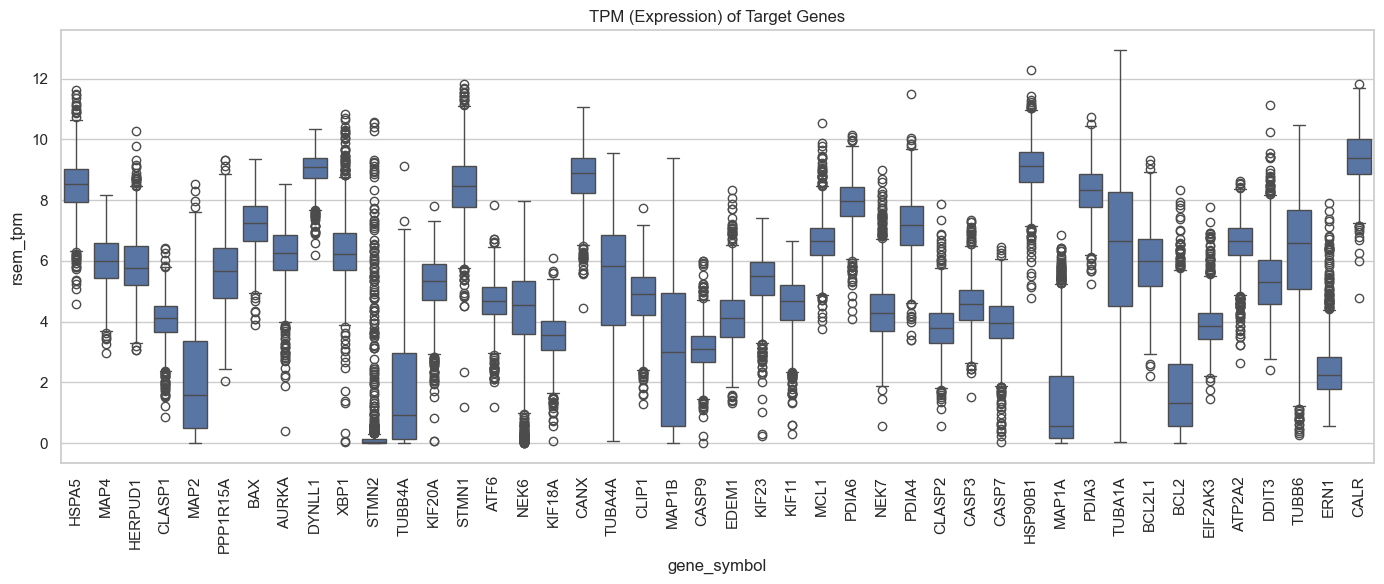

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for top genes 
plt.figure(figsize=(14, 6))
sns.boxplot(x='gene_symbol', y='rsem_tpm', data=filtered_expr_df)
plt.xticks(rotation=90)
plt.title('TPM (Expression) of Target Genes')
plt.ylabel('rsem_tpm')
plt.tight_layout()
plt.savefig("Gene_Expression of Top_selected_Drug in_Digestive_system.png", dpi=300)
plt.show()